In [1]:
import os

path = "/home/ubuntu/spark-cases/SparkML"
os.chdir(path)


In [2]:
from utils.spark_utils import get_spark_session


spark = get_spark_session()
spark

#SPARK UI: IP:4040

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/05 18:31:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
data_path = path + "/datasources/churn_data.csv"

df_churn = spark.read.csv(data_path, header=True, inferSchema=True)
df_churn.printSchema()


root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [6]:
from ydata_profiling import ProfileReport

report = ProfileReport(df_churn)

file_name = "Churn_spark_profile.html"

report.to_file(file_name)

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 429.88it/s]


In [8]:
from analytics.basic_analytics import SparkAnalytics


SparkAnalytics.ydataprofiling(df_churn, "Churn")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 370.49it/s]


In [11]:
SparkAnalytics.groupBy_counts(df_churn, column="Geography")

+---------+-----+
|Geography|count|
+---------+-----+
|France   |5014 |
|Germany  |2509 |
|Spain    |2477 |
+---------+-----+



In [12]:
SparkAnalytics.data_describe(spark, df_churn)

+---------------+-----+------------------+-------------------+--------+---------+
|Field          |count|mean              |stddev             |min     |max      |
+---------------+-----+------------------+-------------------+--------+---------+
|RowNumber      |10000|5000.5            |2886.8956799071675 |1       |10000    |
|CustomerId     |10000|1.56909405694E7   |71936.18612274907  |15565701|15815690 |
|Surname        |10000|NULL              |NULL               |Abazu   |Zuyeva   |
|CreditScore    |9999 |650.5254525452546 |96.65755254363457  |350     |850      |
|Geography      |10000|NULL              |NULL               |France  |Spain    |
|Gender         |9986 |NULL              |NULL               |Female  |Male     |
|Age            |9960 |38.91606425702811 |10.487733427050824 |18      |92       |
|Tenure         |10000|5.0128            |2.8921743770496837 |0       |10       |
|Balance        |9963 |76432.45615176117 |62411.22432271551  |0.0     |250898.09|
|NumOfProducts  

In [4]:
from analytics.basic_analytics import SparkAnalytics

SparkAnalytics.groupBy_counts_and_freq(df_churn, "Geography")

+---------+-----+-------------+
|Geography|Count|Frequency (%)|
+---------+-----+-------------+
|France   |5014 |50.1         |
|Germany  |2509 |25.1         |
|Spain    |2477 |24.8         |
+---------+-----+-------------+



In [7]:
data_path = path + "/datasources/house_prices.csv"

house_prices = spark.read.csv(data_path, header=True, inferSchema=True)
house_prices.printSchema()


root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

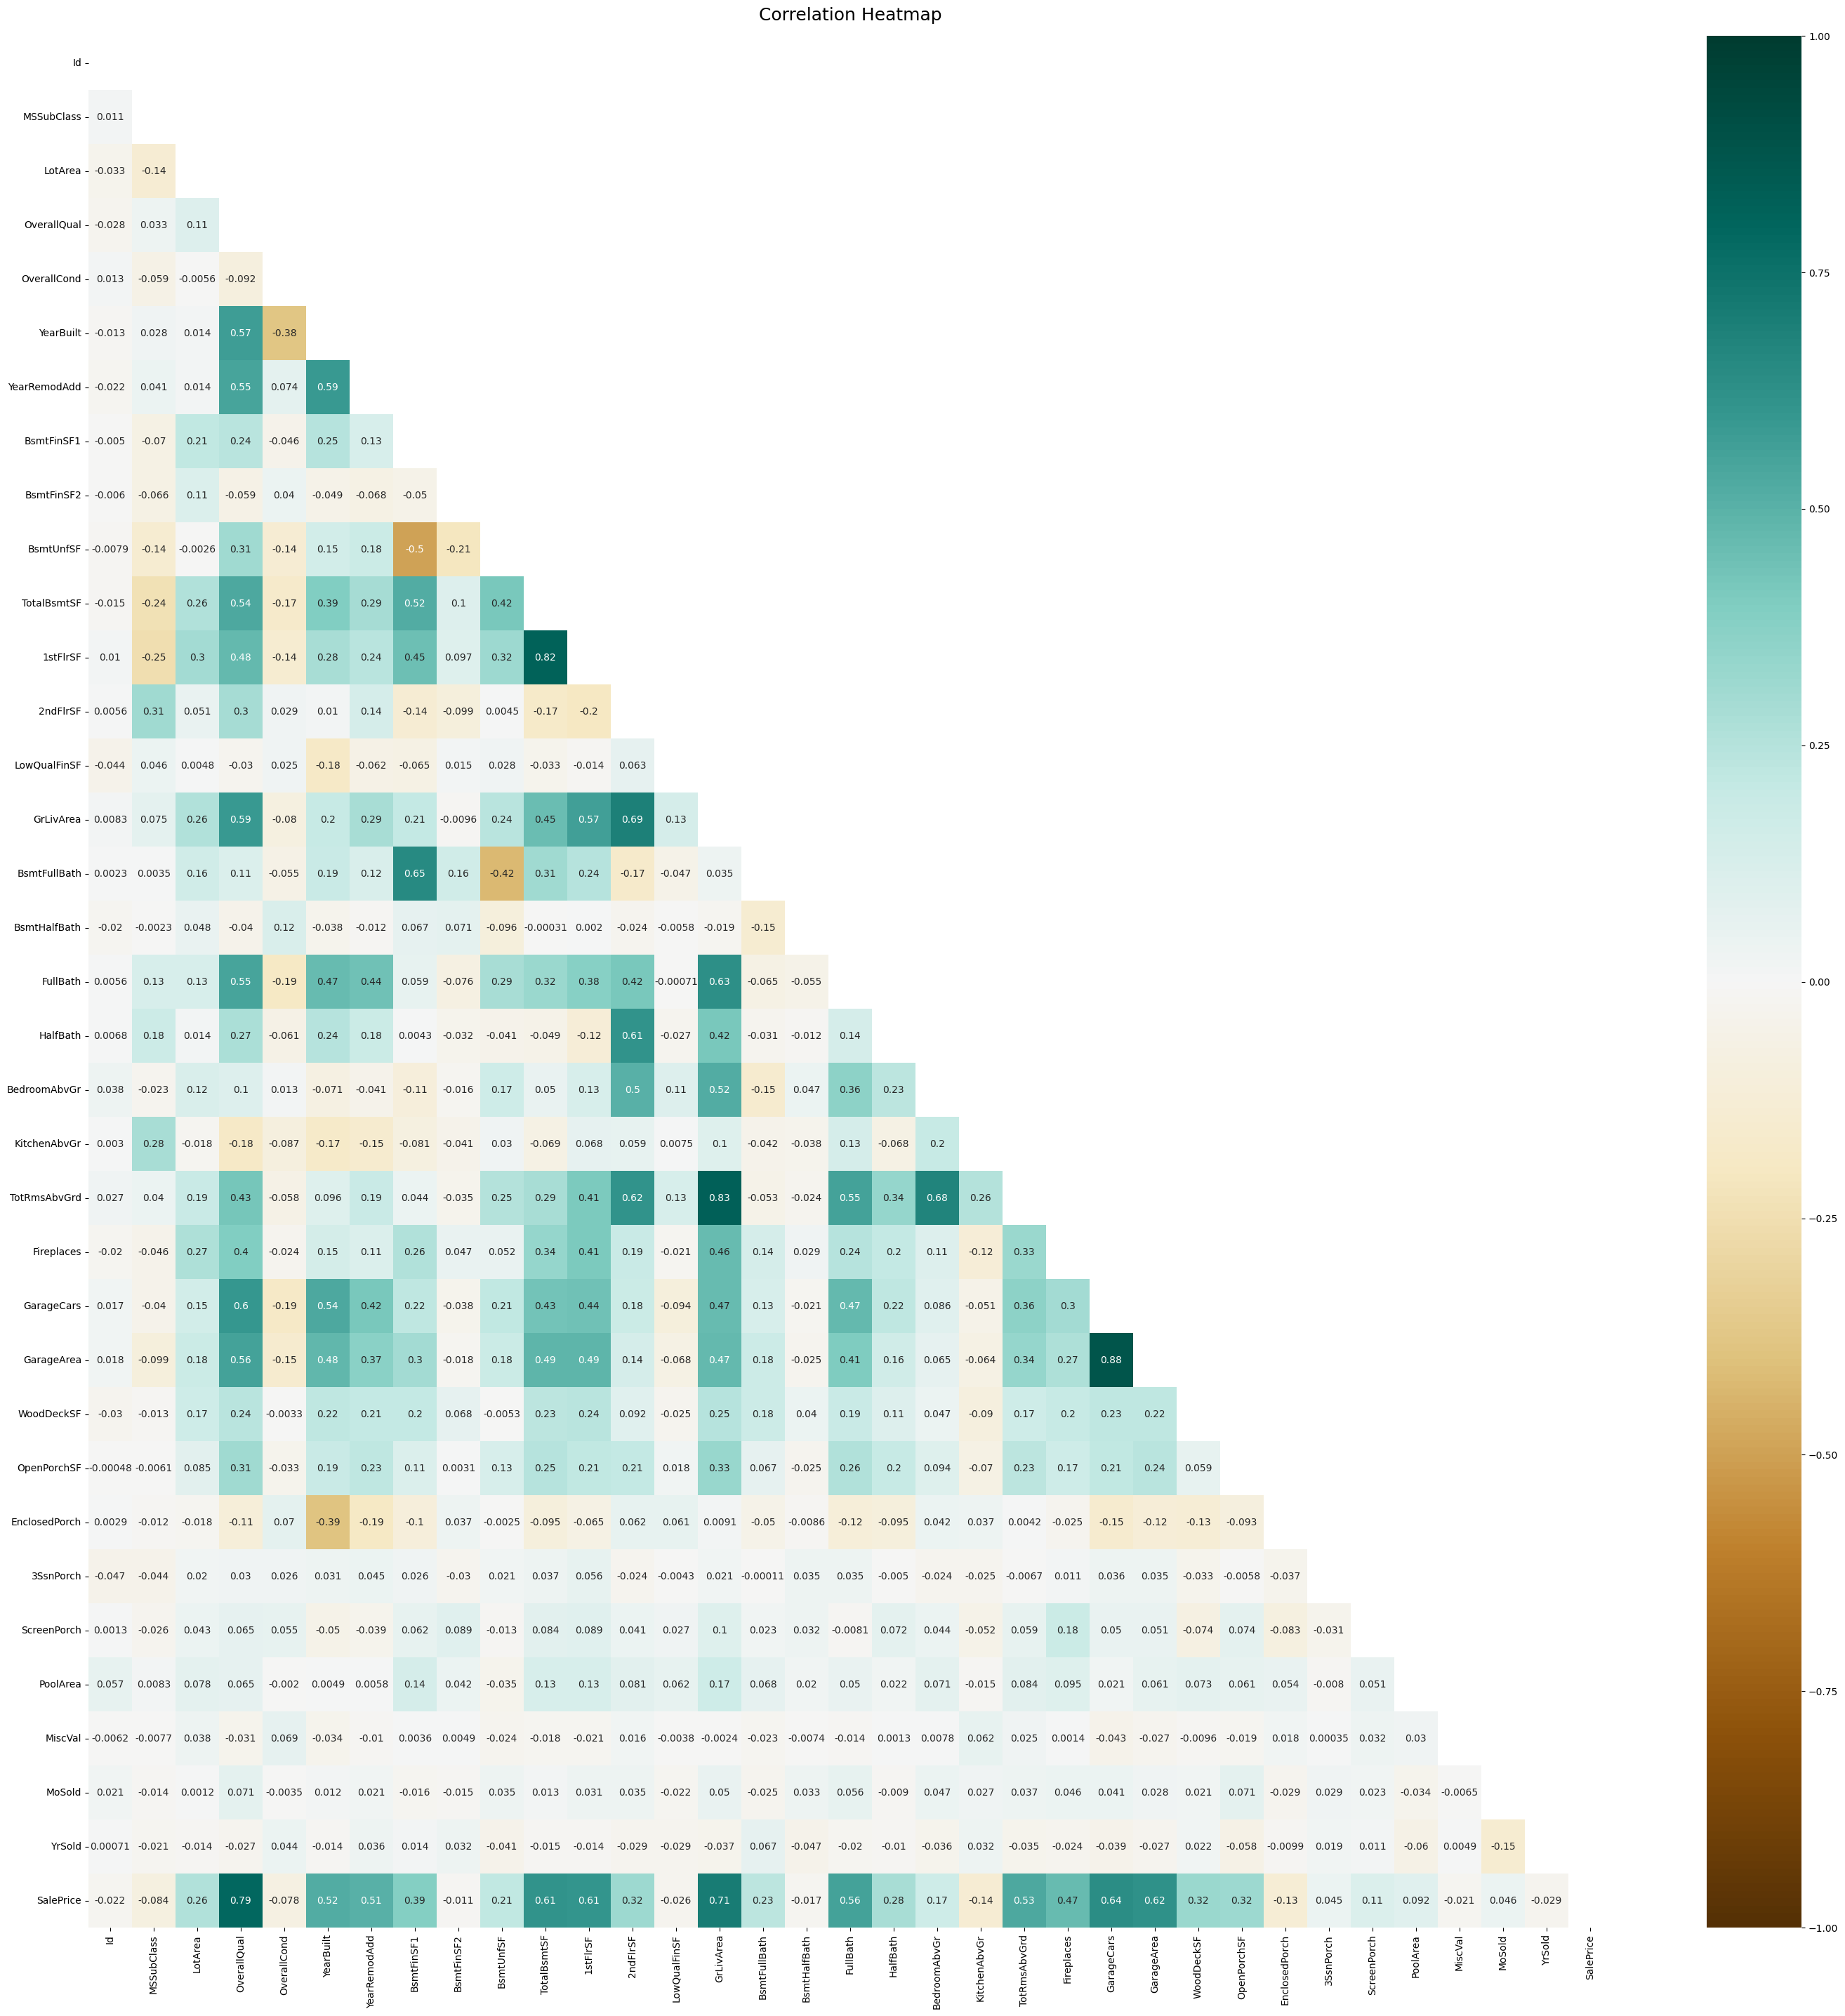

In [8]:
from pyspark.sql import types as T
from analytics.correlation_analyzer import SparkCorrelationAnalyzer

house_prices = house_prices.dropna()

numeric_columns = [col_name for col_name, col_type in house_prices.dtypes if isinstance(house_prices.schema[col_name].dataType, T.NumericType)]


SparkCorrelationAnalyzer.analyze_correlation(house_prices, feature_cols=numeric_columns)
